<a href="https://colab.research.google.com/github/karthik7770/Python/blob/main/linearRegModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
print(df.shape)
df.info()
df.isna().sum()

(500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [ ]:
df['GRE Score'].mode()

0    312.0
1    324.0
dtype: float64

In [ ]:
#inplace: It is a boolean which makes the changes in data frame itself if True.
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace = True)


In [ ]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace = True)


In [ ]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace = True)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
#dropping below two column since its not gonne be use as feature
x = df.drop(['Serial No.','Chance of Admit'],axis = 1)
#y value is our expected output
y = df['Chance of Admit']


In [ ]:
x.head()
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

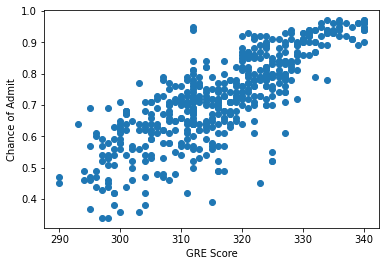

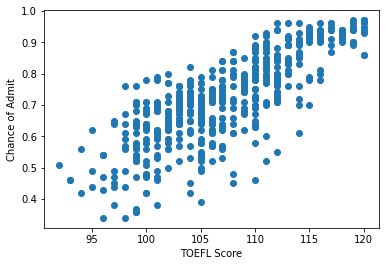

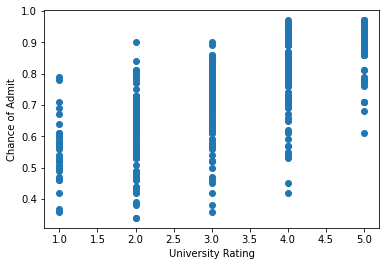

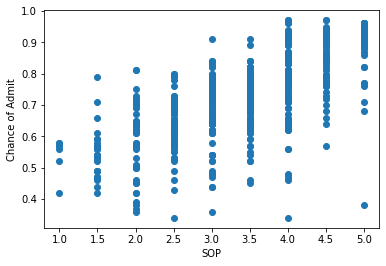

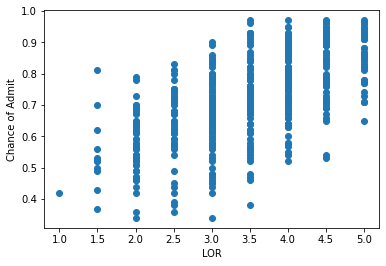

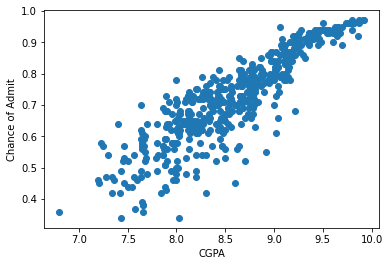

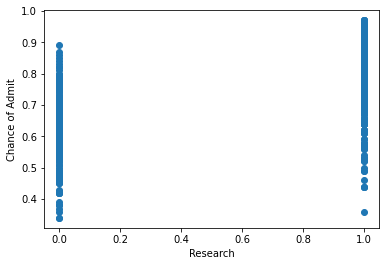

In [ ]:
for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')
    plt.show()

In [ ]:
#trying to scale teh data
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_data = scaler_feature.fit_transform(x)
print(scaler_data)

[[ 1.85052822  1.77547686  0.77890565 ...  1.09894429  1.77680627
   0.88640526]
 [ 0.68147064 -0.04027672  0.77890565 ...  1.09894429  0.48585943
   0.88640526]
 [-0.39765943 -0.53548224 -0.1078766  ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.22103568  2.10561387  1.66568791 ...  1.63976333  1.62785086
   0.88640526]
 [-0.39765943 -0.70055074  0.77890565 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 0.95125316  0.95013432  0.77890565 ...  1.09894429  0.76721964
  -1.12815215]]


In [ ]:
#spliting data into training and test set
from sklearn.model_selection import train_test_split
t_x,test_x,t_y,test_y = train_test_split(x,y,test_size=0.33,random_state=100)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(t_x,t_y)

LinearRegression()

In [ ]:
reg.predict(test_x)

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(reg.predict(t_x),t_y)
score

0.7740751737527217

In [ ]:
filename = 'final_linearModel.pickle'
pickle.dump(reg,open(filename,'wb'))

In [ ]:
#predict using saved model.
loaded_model = pickle.load(open(filename,'rb'))

a = loaded_model.predict(scaler_feature.transform([[300,110,5,5,5,10,1]]))
print(a)
print(a[0])

-0.9119024283140007
